# Aufgabe 1 (2P)
Laden Sie den Datensatz „rawdata_luftqualitaet.csv“ in einen DataFrame. Skalieren Sie die Daten mit dem StandardScaler. Trennen Sie die
Daten in einen Lern- und Testdatensatz zur Classification des Labels "state_air_quality" mit den 3 Klassen 0, 1 und 2. Nutzen Sie alle 5
Merkmale 'humidity_inside','temperature_inside','co2_inside','temperature_heater‘ und 'temperature_wall_inside‘ im Training.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation

In [86]:
df1 = pd.read_csv('rawdata_luftqualitaet.csv')

X = df1.drop('state_air_quality', axis=1)
y = df1[['state_air_quality']].values

print("Attributes:", X.shape, "Results:", y.shape)

# should this be shuffled or not?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scale input
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Attributes: (916, 5) Results: (916, 1)
X_train: (732, 5)
y_train: (732, 1)
X_test: (184, 5)
y_test: (184, 1)


## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen. (1P)

<img src="images/1a.png" width="600">

In [87]:
model = Sequential([
    Dense(60, input_shape=(5,), activation='relu'),
    Dense(60, activation='relu'),
    Dense(3, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

C:\Users\aaron\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess mit „Overfitting“ ähnlich wie unten in der
Abbildung (1P)

<img src="images/1b.png" width="600">

In [88]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=50, verbose=2)

Epoch 1/200
15/15 - 1s - 40ms/step - accuracy: 0.7445 - loss: 0.8210 - val_accuracy: 0.8207 - val_loss: 0.6295
Epoch 2/200
15/15 - 0s - 5ms/step - accuracy: 0.8402 - loss: 0.5222 - val_accuracy: 0.8370 - val_loss: 0.4843
Epoch 3/200
15/15 - 0s - 5ms/step - accuracy: 0.8689 - loss: 0.4081 - val_accuracy: 0.8641 - val_loss: 0.4072
Epoch 4/200
15/15 - 0s - 5ms/step - accuracy: 0.8921 - loss: 0.3415 - val_accuracy: 0.8859 - val_loss: 0.3523
Epoch 5/200
15/15 - 0s - 5ms/step - accuracy: 0.9126 - loss: 0.2914 - val_accuracy: 0.8750 - val_loss: 0.3033
Epoch 6/200
15/15 - 0s - 6ms/step - accuracy: 0.9153 - loss: 0.2532 - val_accuracy: 0.8913 - val_loss: 0.2628
Epoch 7/200
15/15 - 0s - 5ms/step - accuracy: 0.9235 - loss: 0.2211 - val_accuracy: 0.8750 - val_loss: 0.2328
Epoch 8/200
15/15 - 0s - 5ms/step - accuracy: 0.9317 - loss: 0.1958 - val_accuracy: 0.8967 - val_loss: 0.2053
Epoch 9/200
15/15 - 0s - 6ms/step - accuracy: 0.9385 - loss: 0.1746 - val_accuracy: 0.9239 - val_loss: 0.1849
Epoch 10/

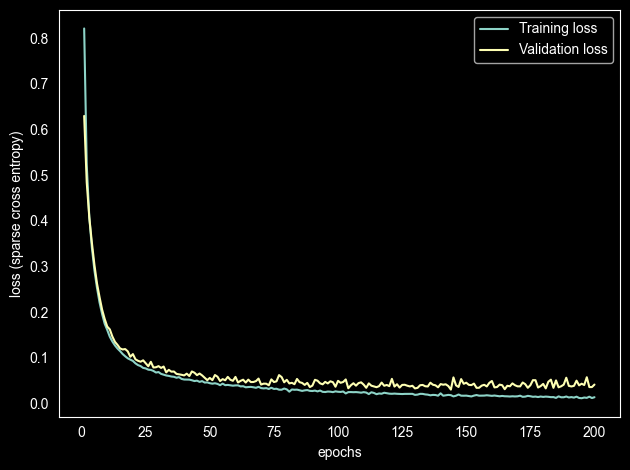

In [89]:
loss_mse = history.history['loss']
val_loss_mse = history.history['val_loss']
plt.ylabel('loss (sparse cross entropy)')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)
plt.plot(range(1, len(val_loss_mse)+1), val_loss_mse)
plt.grid(False)
plt.legend(['Training loss', 'Validation loss'])
plt.tight_layout()

---
# Aufgabe 2 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Fügen Sie dieses Mal
Callbacks für ein EarlyStopping ein. (1P)

In [93]:
model = Sequential([
    Dense(60, input_shape=(5,), activation='relu'),
    Dense(60, activation='relu'),
    Dense(3, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

C:\Users\aaron\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen sowie den definierten Callbacks und visualisieren Sie den Anlernprozess erneut,
ähnlich wie unten, je nach nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die
callbacks zu vermeiden. (1P)

<img src="images/2b.png" width="600">

In [94]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=50, verbose=2, callbacks=early_stop)

Epoch 1/200
15/15 - 1s - 47ms/step - accuracy: 0.7842 - loss: 0.7187 - val_accuracy: 0.8261 - val_loss: 0.5693
Epoch 2/200
15/15 - 0s - 6ms/step - accuracy: 0.8525 - loss: 0.4701 - val_accuracy: 0.8370 - val_loss: 0.4618
Epoch 3/200
15/15 - 0s - 5ms/step - accuracy: 0.8907 - loss: 0.3757 - val_accuracy: 0.8641 - val_loss: 0.4009
Epoch 4/200
15/15 - 0s - 5ms/step - accuracy: 0.9016 - loss: 0.3176 - val_accuracy: 0.8804 - val_loss: 0.3437
Epoch 5/200
15/15 - 0s - 4ms/step - accuracy: 0.9044 - loss: 0.2710 - val_accuracy: 0.8750 - val_loss: 0.2949
Epoch 6/200
15/15 - 0s - 5ms/step - accuracy: 0.9126 - loss: 0.2361 - val_accuracy: 0.8696 - val_loss: 0.2650
Epoch 7/200
15/15 - 0s - 5ms/step - accuracy: 0.9221 - loss: 0.2073 - val_accuracy: 0.8913 - val_loss: 0.2439
Epoch 8/200
15/15 - 0s - 5ms/step - accuracy: 0.9290 - loss: 0.1864 - val_accuracy: 0.8696 - val_loss: 0.2143
Epoch 9/200
15/15 - 0s - 5ms/step - accuracy: 0.9331 - loss: 0.1695 - val_accuracy: 0.9022 - val_loss: 0.1932
Epoch 10/

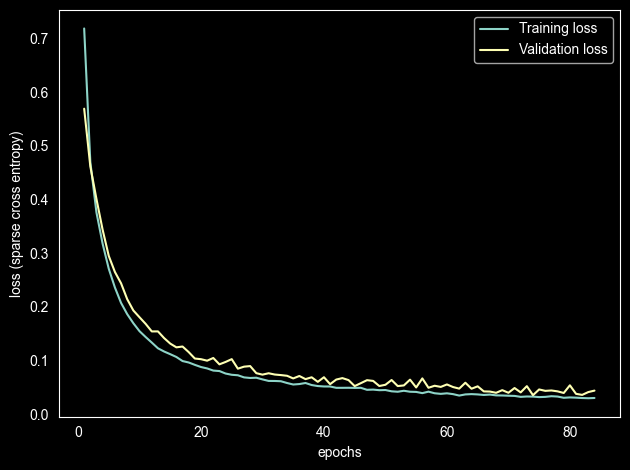

In [95]:
loss_mse = history.history['loss']
val_loss_mse = history.history['val_loss']
plt.ylabel('loss (sparse cross entropy)')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)
plt.plot(range(1, len(val_loss_mse)+1), val_loss_mse)
plt.grid(False)
plt.legend(['Training loss', 'Validation loss'])
plt.tight_layout()

---
# Aufgabe 3 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1 und 2.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Nutzen Sie dieses Mal
die Methode der L2-Regularisierung ohne Callbacks, um eine Überanpassung zu vermeiden. (1P)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess erneut, ähnlich wie unten, je nach
nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die Regularisierung zu vermeiden.
(1P)

<img src="images/3b.png" width="600">